the necker cube bistable percepts phenomena
implemented with a recurrent neural network mechanism

In [1]:
# for google colab
!pip install psyneulink==0.5.2.1

In [1]:
import numpy as np
import psyneulink as pnl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='talk', palette='colorblind')
np.random.seed(0)

In [2]:
# constants
excit_level = 1
inhib_level = -1
# construct the weight matrix
# F/B: front /back
# U/D: up / down
# L/R: left / right
all_nodes = ['FUL', 'FUR', 'FDL', 'FDR', 'BUL', 'BUR', 'BDL', 'BDR']
n_nodes = len(all_nodes)
n_percepts = 2

# construct within percept connectivity
wts_within_percept = np.zeros((n_nodes, n_nodes))
for i, node_i in enumerate(all_nodes):
    for j, node_j in enumerate(all_nodes):
        if len(set(node_i).intersection(node_j)) >= 2:
            wts_within_percept[i, j] = 1
# construct across-percepts inhibitory connection
wts_across_percepts = np.eye(n_nodes)

# scale by excitation/inhibition constants
wts_within_percept *= excit_level
wts_across_percepts *= inhib_level

# form the overall connection
wts_necker_mech = np.vstack([
    np.hstack([wts_within_percept, wts_across_percepts]),
    np.hstack([wts_across_percepts, wts_within_percept])
])

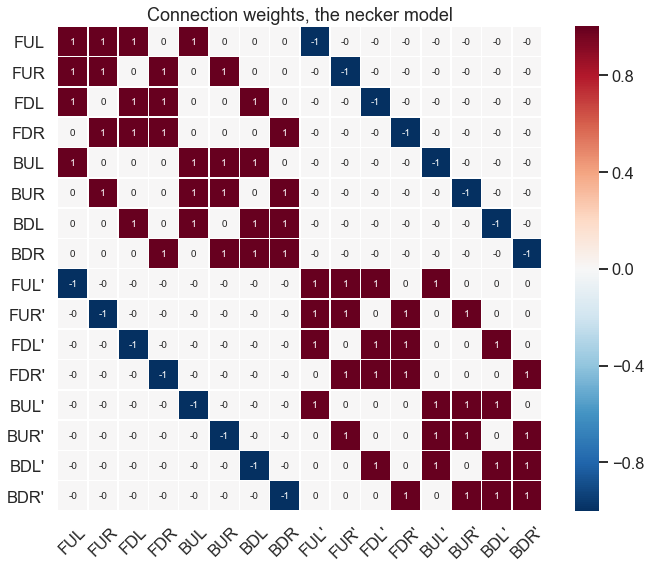

In [7]:
# show the necker cube weights
f, ax = plt.subplots(1, 1, figsize=(10, 8))
sns.heatmap(
    wts_necker_mech,
    cmap='RdBu_r', linewidths=.5, annot=True,
    square=True,
)
ax_tick_locs = np.arange(n_nodes*n_percepts)+.5
ax.set_xticks(ax_tick_locs)
ax.set_xticklabels(all_nodes + [n+'\'' for n in all_nodes], rotation=45)
ax.set_yticks(ax_tick_locs)
ax.set_yticklabels(all_nodes + [n+'\'' for n in all_nodes], rotation=0)
ax.set_title('Connection weights, the necker model')
f.tight_layout()

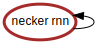

In [4]:
# build the model
function_necker_mech = pnl.Linear
noise_necker_mech = 0
integration_rate_necker_mech = .5
necker_mech = pnl.RecurrentTransferMechanism(
    size=n_percepts * n_nodes,
    function=function_necker_mech,
    matrix=wts_necker_mech,
    integration_rate=integration_rate_necker_mech,
    noise=noise_necker_mech,
    name='necker rnn'
)
necker_process = pnl.Process(pathway=[necker_mech])
necker_system = pnl.System(processes=[necker_process])
necker_system.show_graph(output_fmt = 'jupyter')

In [5]:
# construct the inputs
input_noise = .1
n_time_steps = 10
inputs = [
    np.random.random((1, n_percepts * n_nodes))*input_noise
    for t in range(n_time_steps)
]
input_dict = {necker_mech: inputs}

# run the model
necker_system.run(input_dict, num_trials=n_time_steps);

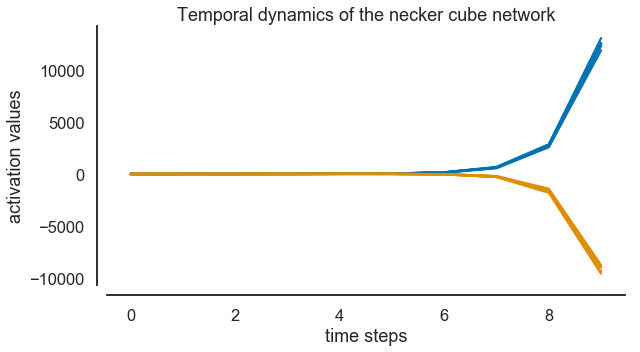

In [6]:
# plot the dynamics
colpal = sns.color_palette('colorblind', n_colors=n_percepts)
acts = np.squeeze(necker_system.results)
f, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(acts[:, :n_nodes], color=colpal[0])
ax.plot(acts[:, n_nodes:], color=colpal[1])
ax.set_title('Temporal dynamics of the necker cube network')
ax.set_xlabel('time steps')
ax.set_ylabel('activation values')
sns.despine(offset=10)
f.tight_layout()